# **Abalone Dataset: Predict the Ring age in years**



## Problem Statement

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.  

The dataset used in this analysis is obtained from the UCI Machine Learning Repository (UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science), at the following link: https://archive.ics.uci.edu/ml/datasets/abalone

# **Building an End-to-End Machine Learning Model**

These are the steps to follow to train a model on data:

- Collect and know the data
- Clean and analyze the data
- Choose the best algorithm for your data
- Train the model using the algorithm
- Evaluate the model
- Retrain using different configurations of the model to get the best performance.
- Make predictions using the model (inference)

**Attribute Information:**

Number of Instances: 4177


Number of Attributes: 8



| Name | Data Type | Measure |    Description|
| --- | --- | --- | --- |
|Sex                 |nominal    |           - |         M, F, and I (infant)|
|Length             | continuous |        mm   | Longest shell measurement|
|Diameter          | continuous  |        mm   |     perpendicular to length|
|Height             | continuous |        mm   |     with meat in shell|
|Whole weight     | continuous   |       grams |     whole abalone|
|Shucked weight  |  continuous   |       grams |     weight of meat|
|Viscera weight | continuous     |     grams   |   gut weight (after bleeding)|
|Shell weight    |  continuous   |       grams |     after being dried|
|Rings             | integer |     | +1.5    gives the age in years|

In [1]:
# Import all the neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy import *
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [2]:
# Loading data from the data file
def load_data():
    # data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/abalone.data', sep=',', header = None)
    data = pd.read_csv('data/abalone.data', sep=',', header = None)
    return data

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')

**Take a look at the data stucture**

In [4]:
# Loading data into dtatframe
raw_data = load_data()
raw_data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# Gathering information about dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
print('This dataset has {} observations with {} features.'.format(raw_data.shape[0], raw_data.shape[1]))

This dataset has 4177 observations with 9 features.


This dataset has 4177 observations with 9 features. There's one categorical column and 8 numerical columns.

In [7]:
# Missing values
raw_data.isnull().sum().sort_values(ascending = False)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

No missing values.

In [8]:
# Create new dataframe with corresponding column names
abalone = raw_data.copy()
abalone = abalone.rename(columns={0: "Sex", 1: "Length", 2: "Diameter",	3: "Height",4: "Whole_weight", 5: "Shucked_weight",6: "Viscera_weight", 7: "Shell_weight", 8: "Rings"})


In [9]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [10]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
abalone.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


From feature discription, we need to calculate the target varible 'ring-age' and add it to the dataset. Given ***ring-age = 1.5 + Rings***.



In [13]:
# Calculate ring-age and drop the column Ring
abalone['ring-age'] = abalone['Rings']+1.5
# abalone = abalone.drop(["Rings"], axis = 1)
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,ring-age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [14]:
abalone.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,ring-age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


# **Data processing**

## 1. Clean the data (eg. convert M, F and I to 0, 1 and 2).



In [15]:
# abalone = abalone.rename(columns={0: "Sex", 1: "Length", 2: "Diameter",	3: "Height",4: "Whole_weight", 5: "Shucked_weight",6: "Viscera_weight", 7: "Shell_weight", 8: "Rings"})
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,ring-age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [16]:
abalone["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

/tmp/ipykernel_573/2760600585.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sex', data = abalone, palette="Set2")


<Axes: xlabel='Sex', ylabel='count'>

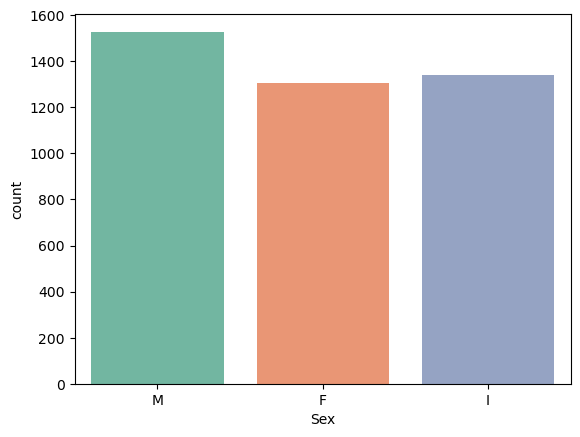

In [17]:
sns.countplot(x = 'Sex', data = abalone, palette="Set2")

In [18]:
abalone=abalone.replace(['M', 'F', 'I'], ['0','1','2'])

In [19]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,ring-age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [20]:
X = abalone.drop(["ring-age"], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [21]:
y = abalone.filter(["ring-age"], axis=1)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ring-age  4177 non-null   float64
dtypes: float64(1)
memory usage: 32.8 KB


In [22]:
#abalone=abalone.replace(['M', 'F', 'I'], ['0','1','2'])
X=X.replace(['M', 'F', 'I'], [0,1,2])
X["Sex"] = X["Sex"].astype("int")
X["Sex"].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


## 2. Develop a correlation map using a heatmap and discuss major observations.

In [24]:
def heatmap_corr_matrix(data):
  # Calculate the correlation matrix
  corr_matrix = data.corr()
  # Create a heatmap of the correlation matrix
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') #Blues
  plt.show()


/tmp/ipykernel_573/733383779.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


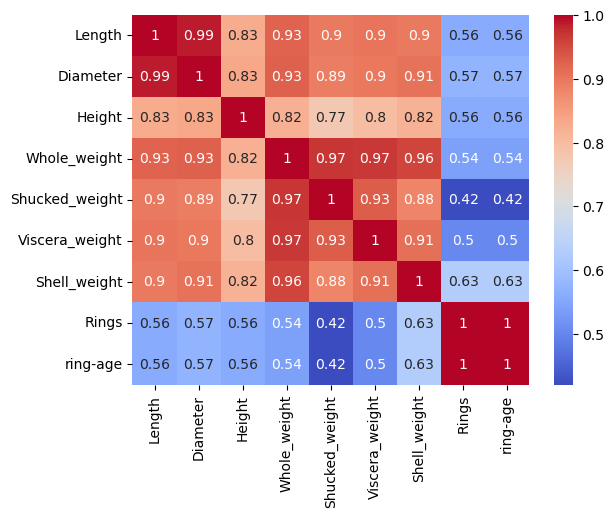

In [25]:
abalone1 = abalone.replace(['M', 'F', 'I'], ['0','1','2'])
abalone1["Sex"].value_counts()
heatmap_corr_matrix(abalone1)
# Calculate the correlation matrix
# corr_matrix1 = abalone1.corr()

# # Create a heatmap of the correlation matrix
# sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
# plt.show()

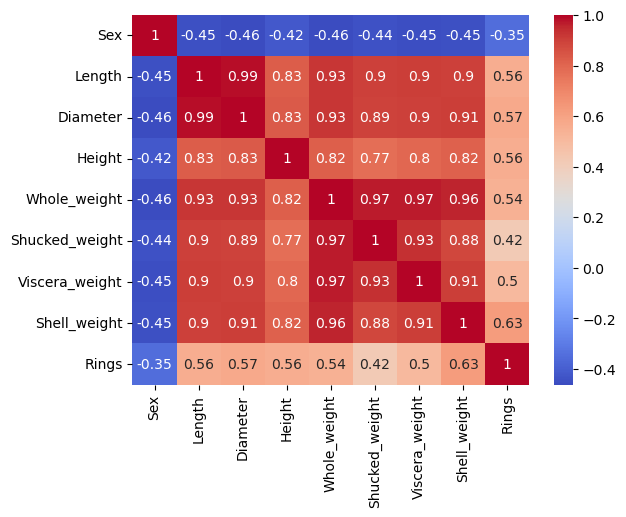

In [26]:
# Plot the correlation matrix
heatmap_corr_matrix(X)

Whole Weight is almost linearly varying with all other features except ring age. Height has least linearity with remaining features. Ring age is most linearly proprtional with shell weight, diameter and length. Ring age is least correlated with shucked weight.

We can observe from the correlation matrix that Length - Diameter and Whole weight - Shucked weight has positive  correlation as well as Sex - Height (-0.42) and Sex - Shucked Weight (-0.44) have least correlation.

## 3. Pick two of the most correlated features (negative or positive) and create a scatter plot with ring-age. Discuss major observations.

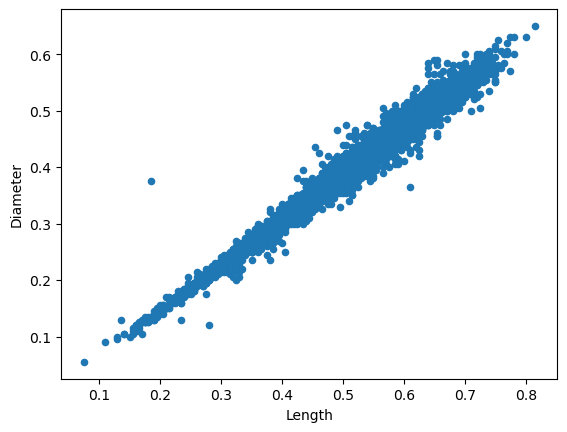

In [27]:
# Visualize the data
abalone.plot(kind='scatter', x="Length", y="Diameter")
plt.show()


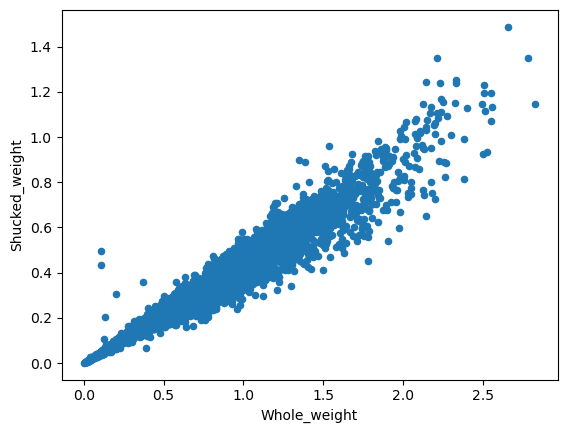

In [28]:
# Visualize the data
abalone.plot(kind='scatter', x="Whole_weight", y="Shucked_weight")
plt.show()

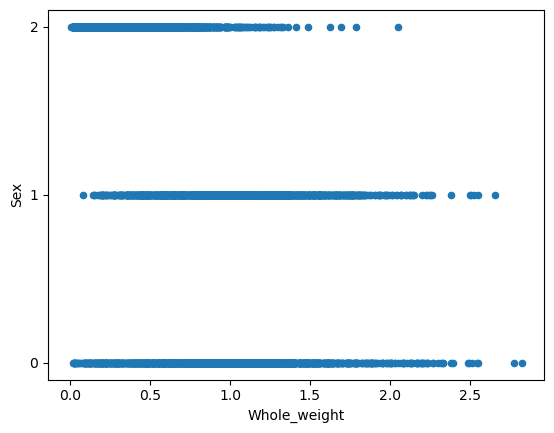

In [29]:
# Visualize the data
abalone.plot(kind='scatter', x="Whole_weight",  y="Sex")
plt.show()

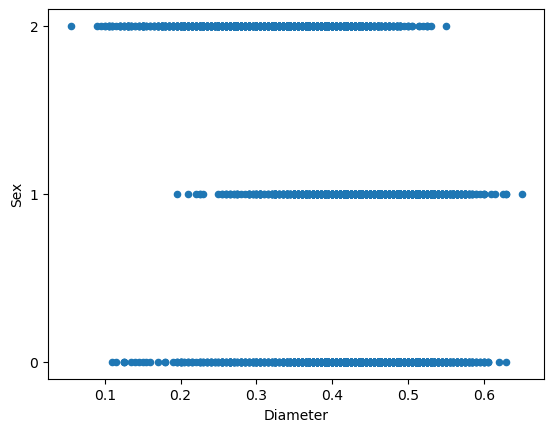

In [30]:
# Visualize the data
abalone.plot(kind='scatter', x="Diameter", y="Sex")
plt.show()

In [31]:
# # Visualize the data
# sns.scatterplot(data=abalone, x="Diameter", y="Sex", hue="Sex")
# # abalone.plot(kind='scatter', x="Diameter", y="Sex", hue = "Sex")
# plt.show()

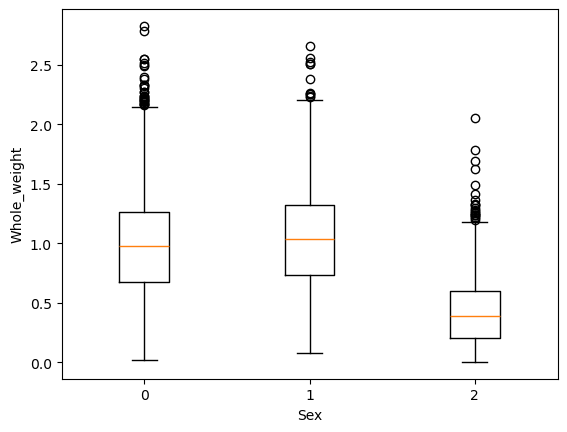

In [32]:
box_plot_data = {}
for x_factor in abalone['Sex']:
    box_plot_data[x_factor] = abalone[abalone['Sex'] == x_factor]['Whole_weight']

# Create a box plot using the plt.boxplot() function
fig, ax = plt.subplots()

ax.boxplot(box_plot_data.values(), labels=box_plot_data.keys())

plt.xlabel('Sex')
plt.ylabel('Whole_weight')

plt.show()

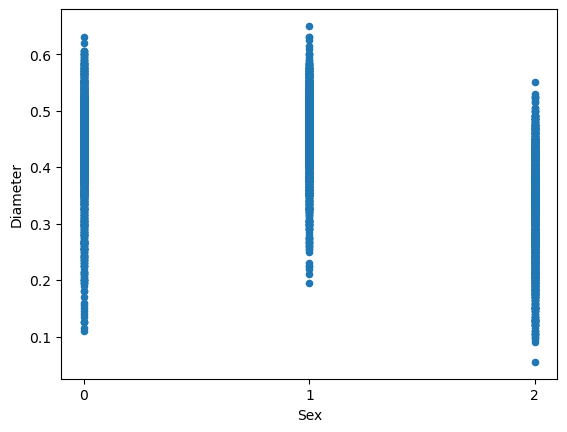

In [33]:
# Visualize the data
abalone.plot(kind='scatter', x="Sex", y="Diameter")
plt.show()

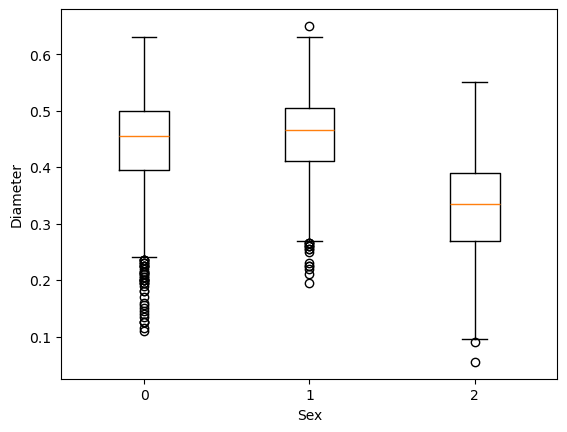

In [34]:
box_plot_data = {}
for x_factor in abalone['Sex']:
    box_plot_data[x_factor] = abalone[abalone['Sex'] == x_factor]['Diameter']

# Create a box plot using the plt.boxplot() function
fig, ax = plt.subplots()

ax.boxplot(box_plot_data.values(), labels=box_plot_data.keys())

plt.xlabel('Sex')
plt.ylabel('Diameter')

plt.show()

<<<<< Discussion >>>>

## 4. Create histograms of the two most correlated features, and the ring-age. What are the major observations?

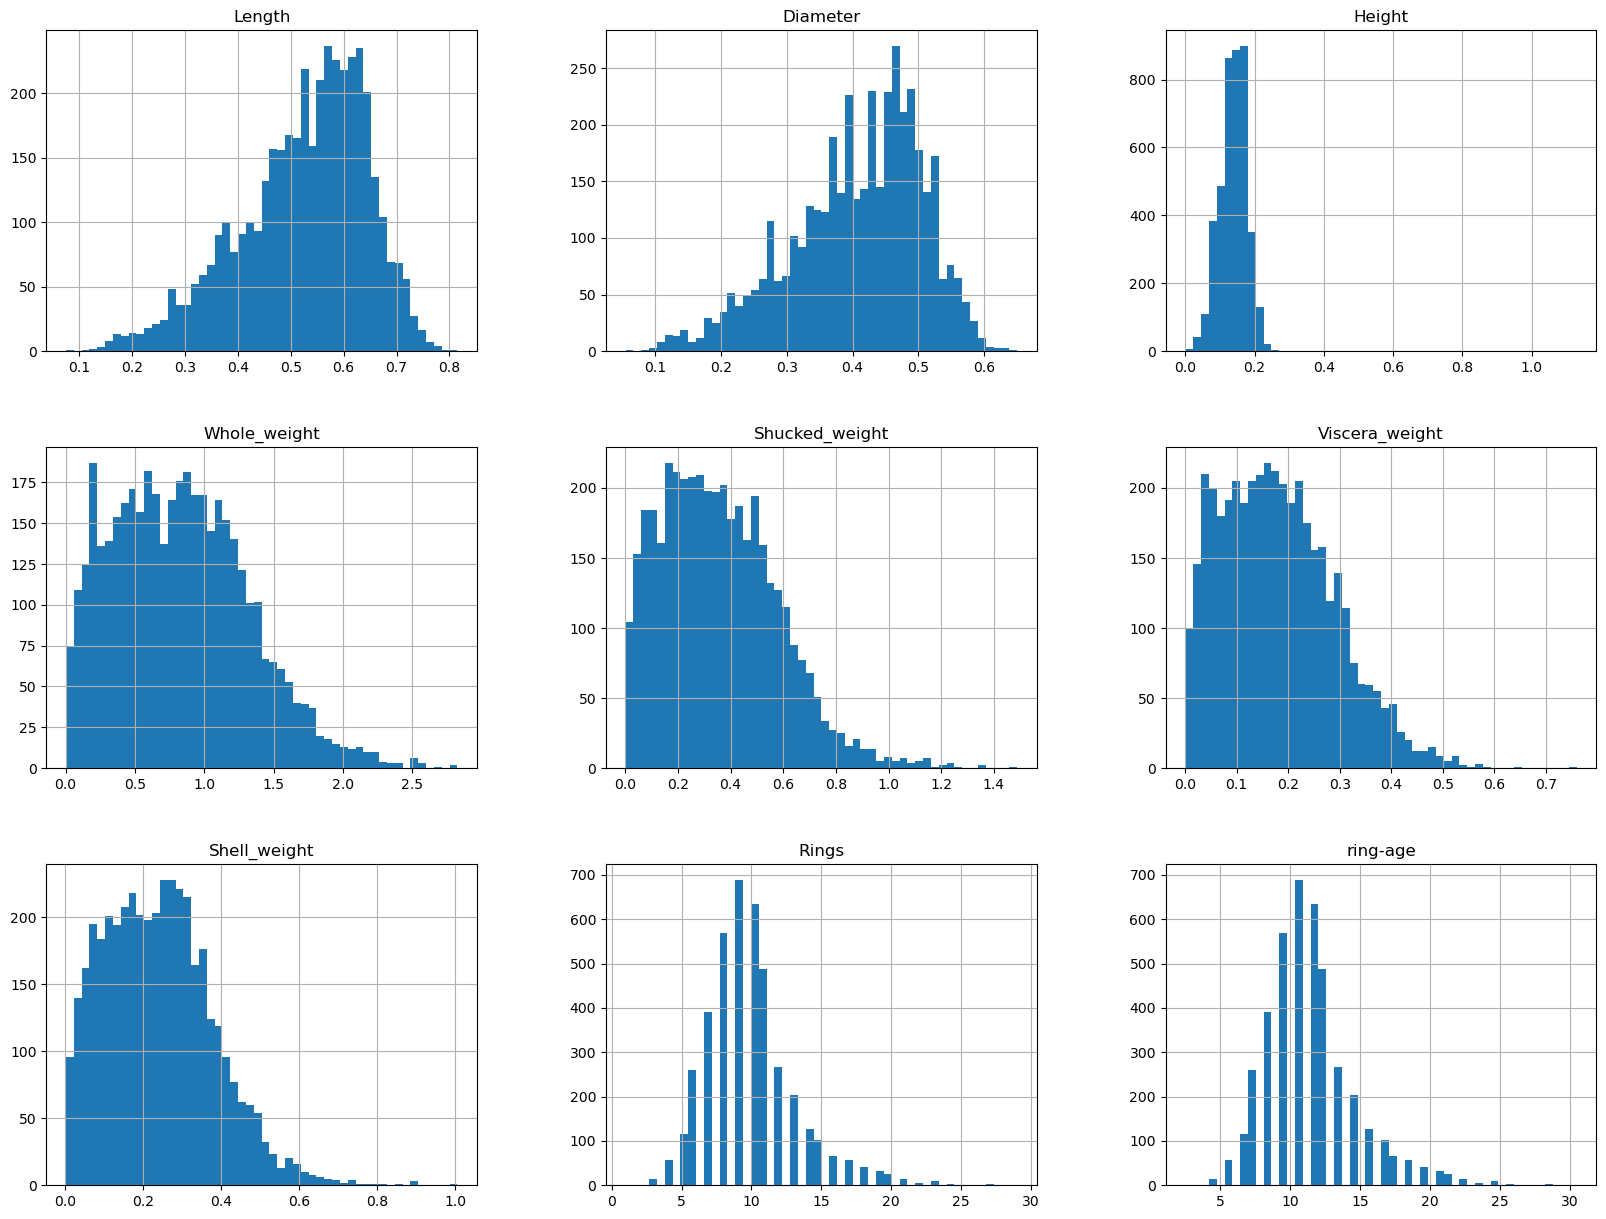

In [35]:
abalone.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [36]:
feature_1 = abalone.filter(["Diameter", "Length","ring-age"], axis=1)
#y = y.rename(columns={8: "Rings"})
feature_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Diameter  4177 non-null   float64
 1   Length    4177 non-null   float64
 2   ring-age  4177 non-null   float64
dtypes: float64(3)
memory usage: 98.0 KB


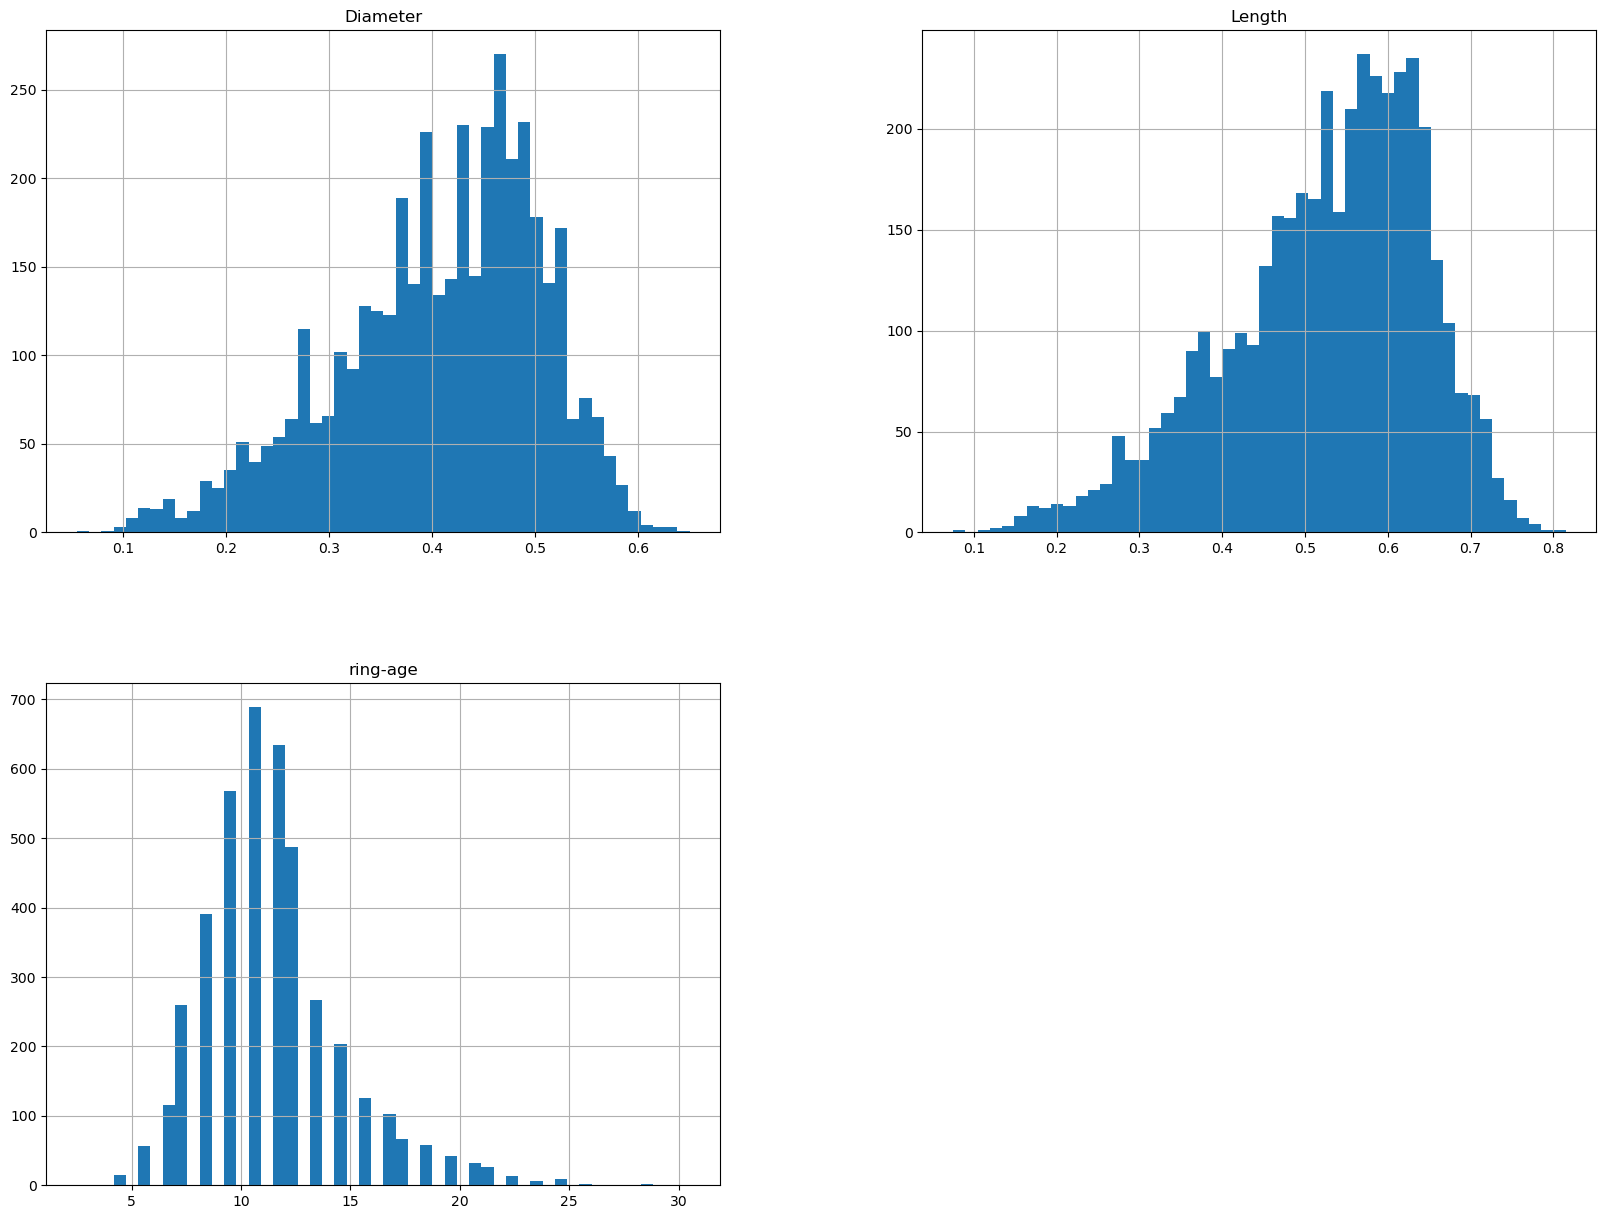

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
feature_1.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
# feature_1.hist("Diameter", density=True, histtype='barstacked', rwidth=0.8)
# feature_1.hist("Length", density=True, histtype='barstacked', rwidth=0.8)
# feature_1.hist("Rings", density=True, histtype='barstacked', rwidth=0.8)
# feature_1.set_title('barstacked')
plt.show()

Plotting histogram

array([[<Axes: xlabel='Length', ylabel='Length'>,
        <Axes: xlabel='Diameter', ylabel='Length'>,
        <Axes: xlabel='Height', ylabel='Length'>,
        <Axes: xlabel='Whole_weight', ylabel='Length'>,
        <Axes: xlabel='Shucked_weight', ylabel='Length'>,
        <Axes: xlabel='Viscera_weight', ylabel='Length'>,
        <Axes: xlabel='Shell_weight', ylabel='Length'>,
        <Axes: xlabel='Rings', ylabel='Length'>,
        <Axes: xlabel='ring-age', ylabel='Length'>],
       [<Axes: xlabel='Length', ylabel='Diameter'>,
        <Axes: xlabel='Diameter', ylabel='Diameter'>,
        <Axes: xlabel='Height', ylabel='Diameter'>,
        <Axes: xlabel='Whole_weight', ylabel='Diameter'>,
        <Axes: xlabel='Shucked_weight', ylabel='Diameter'>,
        <Axes: xlabel='Viscera_weight', ylabel='Diameter'>,
        <Axes: xlabel='Shell_weight', ylabel='Diameter'>,
        <Axes: xlabel='Rings', ylabel='Diameter'>,
        <Axes: xlabel='ring-age', ylabel='Diameter'>],
       [<Axes: xla

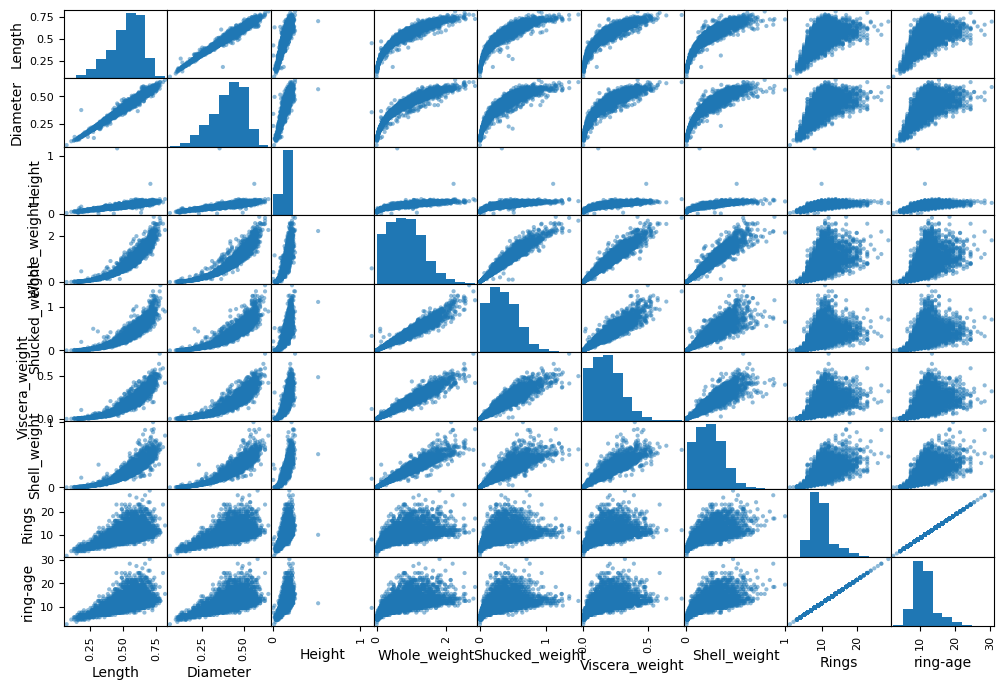

In [38]:


#attributes = ["median_house_value", "median_income", "total_rooms",
#              "housing_median_age"]
# scatter_matrix(abalone[attributes], figsize=(12, 8))
scatter_matrix(abalone, figsize=(12, 8))

## 5. Create a 60/40 train/test split - which takes a random seed based on the experiment number to create a new dataset for every experiment.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) #random_state=42

In [40]:
print(y_train["ring-age"].value_counts())

10.5    413
11.5    386
9.5     347
12.5    302
8.5     237
13.5    154
7.5     151
14.5    115
15.5     76
6.5      70
16.5     54
17.5     44
18.5     38
5.5      34
19.5     20
20.5     20
21.5     16
4.5       7
23.5      6
22.5      6
24.5      5
3.5       1
2.5       1
28.5      1
26.5      1
25.5      1
Name: ring-age, dtype: int64


In [41]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB
None


In [42]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 918 to 1859
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2506 non-null   int64  
 1   Length          2506 non-null   float64
 2   Diameter        2506 non-null   float64
 3   Height          2506 non-null   float64
 4   Whole_weight    2506 non-null   float64
 5   Shucked_weight  2506 non-null   float64
 6   Viscera_weight  2506 non-null   float64
 7   Shell_weight    2506 non-null   float64
 8   Rings           2506 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 195.8 KB
None


In [43]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 3536 to 2999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1671 non-null   int64  
 1   Length          1671 non-null   float64
 2   Diameter        1671 non-null   float64
 3   Height          1671 non-null   float64
 4   Whole_weight    1671 non-null   float64
 5   Shucked_weight  1671 non-null   float64
 6   Viscera_weight  1671 non-null   float64
 7   Shell_weight    1671 non-null   float64
 8   Rings           1671 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 130.5 KB
None


Report the mean and standard deviation of the train and test set and class distribution and also the histograms for each feature.

In [44]:
print('Training Dataset: ')
print('Mean: \n', X_train.mean(), '\nStandard Deviation: \n', X_train.std())


Training Dataset: 
Mean: 
 Sex               0.966081
Length            0.524731
Diameter          0.408306
Height            0.140176
Whole_weight      0.830512
Shucked_weight    0.359125
Viscera_weight    0.181312
Shell_weight      0.239954
Rings             9.906624
dtype: float64 
Standard Deviation: 
 Sex               0.825762
Length            0.119601
Diameter          0.098899
Height            0.044028
Whole_weight      0.487098
Shucked_weight    0.218965
Viscera_weight    0.109374
Shell_weight      0.139547
Rings             3.184302
dtype: float64


In [45]:
print('Testing Dataset: ')
print('Mean: \n', X_test.mean(), '\nStandard Deviation: \n', X_test.std())

Testing Dataset: 
Mean: 
 Sex               0.939557
Length            0.522885
Diameter          0.407244
Height            0.138528
Whole_weight      0.826088
Shucked_weight    0.359730
Viscera_weight    0.179517
Shell_weight      0.237146
Rings             9.974267
dtype: float64 
Standard Deviation: 
 Sex               0.830877
Length            0.120854
Diameter          0.099775
Height            0.038281
Whole_weight      0.495418
Shucked_weight    0.226450
Viscera_weight    0.109997
Shell_weight      0.138709
Rings             3.283591
dtype: float64


In [46]:
# Class distribution of features
X_train["Sex"].value_counts()

0    898
2    813
1    795
Name: Sex, dtype: int64

In [47]:
# Class distribution
y["ring-age"].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: ring-age, dtype: int64

## 6. Add any other visualisation of the dataset you find appropriate (Optional).

/usr/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 52.2% of the points cannot be placed; you may want to decrease t

<Axes: xlabel='Sex', ylabel='ring-age'>

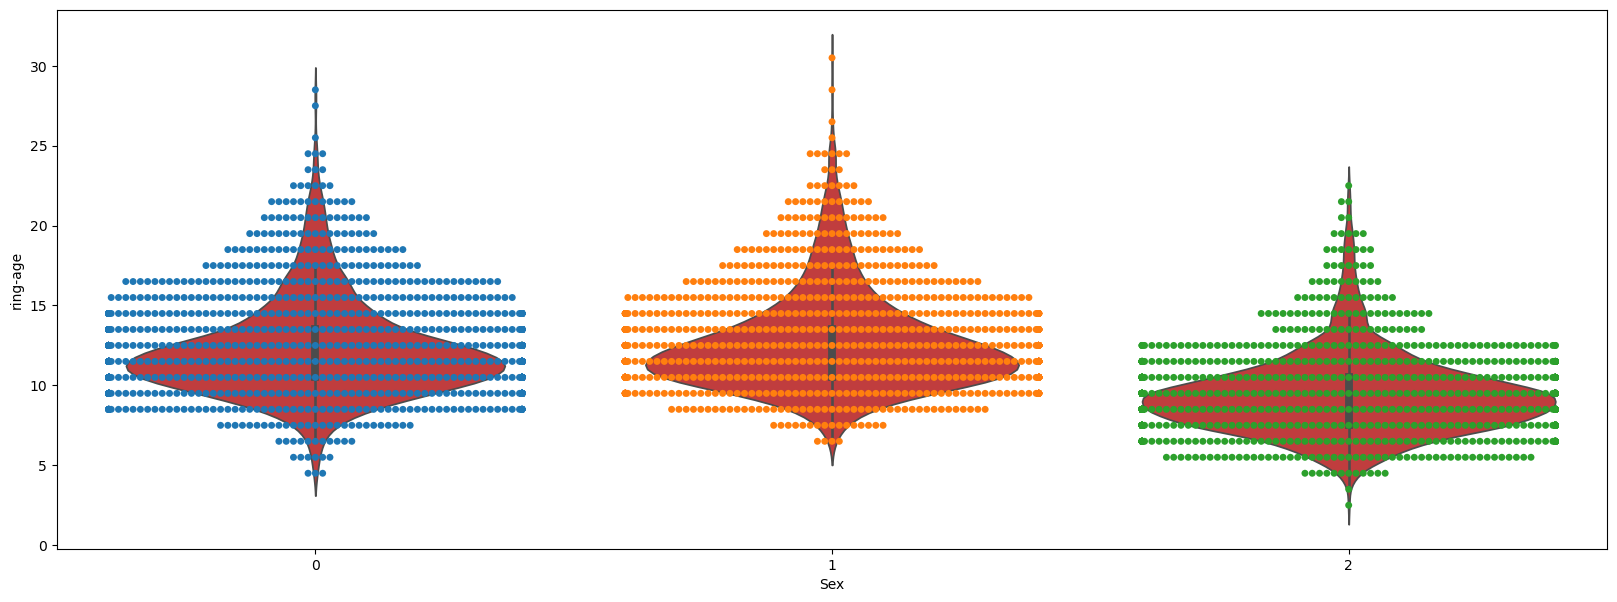

In [48]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'ring-age', data = abalone, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'ring-age', data = abalone)

Male : age majority lies in between 7.5 years to 19 years
Female: age majority lies in between 8 years to 19 years
Infant: age majority lies in between 6 years to < 10 years

# **Modelling**

## 1. Develop a linear regression model using all features for ring-age using 60 percent of data picked randomly for training and remaining for testing. Visualise your model prediction using appropriate plots. Report the RMSE and R-squared score.

## 2. Develop a linear regression model with all input features,
## i) without normalising input data,
## ii) with normalising input data.



## 3. Develop a linear regression model with two selected input features from the data processing step.



## 4. In each of the above investigations, run 30 experiments each and report the mean and std of the RMSE and R-squared score of the train and test datasets. Write a paragraph to compare your results of the different approaches taken. Note that if your code can't work for 30 experiments, only 1 experiment run is fine. You won't be penalised if you just do 1 experiment run.

In [50]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random
from numpy import *
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr

In [51]:
def scikit_linear_mod(x_train, x_test, y_train, y_test):

    regr = linear_model.LinearRegression()


    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rsquared = r2_score(y_test, y_pred)

    ######
    residuals = y_pred - y_test
    # plt.plot(residuals, linewidth=1)
    # Create scatter plot
    # plt.scatter(X_test, y_test, color="blue")

    # # Create line plot
    # plt.scatter(X_test, y_pred, color="red")
    # plt.xlabel("actual data")
    # plt.ylabel("predicted predicted")

    # Display the plot
    # plt.show()

    # plt.savefig('scikit_linear.png')

    return rmse, rsquared, regr.coef_


In [52]:
def setup_experiment(normalise, i, feature_df, target_df):


    percent_test = 0.4

    data_inputx = feature_df.copy()
    data_inputy = target_df.copy()

    if normalise == True:
        transformer = Normalizer().fit(data_inputx)  # fit does nothing.
        data_inputx = transformer.transform(data_inputx)

    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=percent_test, random_state=i)

    return x_train, x_test, y_train, y_test

In [53]:
def experiment(n, norm, feature, target):
  max_exp = n
  normalise = norm
  print('Number of experiments :', max_exp, 'Normalise = ', normalise)

  rmse_list = np.zeros(max_exp)
  rsq_list = np.zeros(max_exp)

  for i in range(0,max_exp):
    # print("Experiment - ", i)
    x_train, x_test, y_train, y_test = setup_experiment(normalise, i, feature, target)
    rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)

    rmse_list[i] = rmse
    rsq_list[i] = rsquared


  print('rmse: ', rmse_list)
  # Explained variance score: 1 is perfect prediction
  print('rsq: ', rsq_list)

  mean_rmse = np.mean(rmse_list)
  std_rmse = np.std(rmse_list)

  mean_rsq = np.mean(rsq_list)
  std_rsq = np.std(rsq_list)

  print('mean_rmse: ', mean_rmse, 'std_rmse: ', std_rmse)

  print('mean_rsq: ', mean_rsq, 'std_rsq: ', std_rsq)


In [54]:
y = abalone.filter(["ring-age"])
X_all = abalone.drop(["Rings","ring-age"], axis=1)

print(X_all.head())
print(y.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   2   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  
   ring-age
0      16.5
1       8.5
2      10.5
3      11.5
4       8.5


In [55]:
experiment(30, False, feature=X_all, target=y)

Number of experiments : 30 Normalise =  False
rmse:  [2.22567501 2.27174306 2.31204708 2.26078138 2.21451902 2.27746345
 2.15836233 2.251176   2.24258367 2.26729804 2.23113878 2.19927602
 2.11688662 2.12843521 2.29671958 2.22424802 2.27395586 2.19898639
 2.27691271 2.2601723  2.28240288 2.219433   2.23327874 2.23993612
 2.33236943 2.22337242 2.23779127 2.26120829 2.15021015 2.17518438]
rsq:  [0.51952324 0.49867345 0.52423387 0.47859897 0.50242148 0.5068571
 0.56031508 0.53092735 0.52327187 0.51544326 0.52465648 0.54841619
 0.56131975 0.55386333 0.51596194 0.50858661 0.50472069 0.53240248
 0.51605624 0.51530786 0.51650434 0.54955991 0.49135356 0.50801213
 0.48758854 0.48401877 0.54049558 0.50984461 0.55303418 0.5324856 ]
mean_rmse:  2.234785573216999 std_rmse:  0.05060209021426619
mean_rsq:  0.5204818164392812 std_rsq:  0.02210463081444215


In [56]:
experiment(30, True, feature=X_all, target=y)

Number of experiments : 30 Normalise =  True
rmse:  [2.17446924 2.18501183 2.26776421 2.14475909 2.17099548 2.24384252
 2.16783138 2.20012478 2.19048642 2.21835662 2.18129559 2.17925192
 2.0705645  2.13158805 2.22021913 2.21313545 2.19501582 2.15409012
 2.22808899 2.22182591 2.22742241 2.19751554 2.13939836 2.17160316
 2.21963099 2.11158457 2.24608633 2.18253308 2.12128394 2.16421113]
rsq:  [0.54137743 0.53622229 0.54228413 0.5307419  0.52178782 0.52130962
 0.5564487  0.55196099 0.54516425 0.53613657 0.54565741 0.55660197
 0.58030827 0.55254063 0.54767015 0.51348465 0.53851092 0.55130126
 0.53658808 0.53161504 0.5395175  0.5584124  0.53321868 0.53757207
 0.53592763 0.53459995 0.53708267 0.54335962 0.56497912 0.53719068]
mean_rmse:  2.184666217489276 std_rmse:  0.04290735336508177
mean_rsq:  0.5419857466619026 std_rsq:  0.013262721603074073


In [57]:
# With two features
X2 = abalone.filter(["Length","Diameter"], axis=1)

print(X2.head())
print(y.head())

   Length  Diameter
0   0.455     0.365
1   0.350     0.265
2   0.530     0.420
3   0.440     0.365
4   0.330     0.255
   ring-age
0      16.5
1       8.5
2      10.5
3      11.5
4       8.5


In [58]:
# With two features
experiment(30, False, feature=X2, target=y)

Number of experiments : 30 Normalise =  False
rmse:  [2.62399905 2.65248744 2.69012643 2.59743997 2.62318504 2.65594034
 2.64360156 2.72243049 2.66319177 2.71467847 2.62009291 2.64602554
 2.56956125 2.54855977 2.72107996 2.55972129 2.64674825 2.64465766
 2.70128789 2.67565097 2.73724643 2.66178339 2.54657502 2.62907648
 2.67147926 2.51671402 2.64639876 2.63942818 2.60599285 2.5471049 ]
rsq:  [0.33215414 0.31654653 0.35591148 0.31175069 0.30183086 0.32933355
 0.34039359 0.31398311 0.32767641 0.30535293 0.34447721 0.34631736
 0.35364541 0.36035841 0.32056773 0.34917246 0.32901719 0.32365849
 0.31884825 0.32073098 0.30459828 0.35211433 0.33863213 0.32221872
 0.32775471 0.3388847  0.35736982 0.33216014 0.34346341 0.35894321]
mean_rmse:  2.6374088456292957 std_rmse:  0.056172072178454525
mean_rsq:  0.3325955411414172 std_rsq:  0.016881975988073786


In [59]:
# With two features
experiment(30, True, feature=X2, target=y)

Number of experiments : 30 Normalise =  True
rmse:  [3.00500491 3.04657395 3.11864536 2.98663676 2.95593414 2.99658087
 3.02502746 3.07707497 3.10225542 3.12039929 3.01633401 3.06877875
 2.96631609 2.93865834 3.07175956 2.97241153 3.00455382 3.04378928
 3.06649457 3.06408077 3.11808048 3.06126624 2.90343956 2.97814089
 3.07447844 3.03436841 3.05959434 3.01564217 3.02330132 2.95526577]
rsq:  [0.12413079 0.09837545 0.13437028 0.09004575 0.11347231 0.14626722
 0.13632269 0.1236101  0.08771913 0.08220064 0.13121308 0.12075472
 0.13863397 0.14955694 0.13415929 0.12239632 0.13533855 0.10410671
 0.12221828 0.10919365 0.09763425 0.14305064 0.14028258 0.13029172
 0.10963709 0.03894977 0.14102951 0.12820925 0.11636001 0.13702954]
mean_rmse:  3.0290295819954864 std_rmse:  0.055220385377776585
mean_rsq:  0.11955200798148967 std_rsq:  0.0232855633057431


In [60]:
# With one feature
X1 = abalone.filter(["Diameter"], axis=1)

print(X1.head())
print(y.head())

   Diameter
0     0.365
1     0.265
2     0.420
3     0.365
4     0.255
   ring-age
0      16.5
1       8.5
2      10.5
3      11.5
4       8.5


In [61]:
# With one feature
experiment(30, False, feature=X1, target=y)

Number of experiments : 30 Normalise =  False
rmse:  [2.63205355 2.65496964 2.70133599 2.59341994 2.62900603 2.66676614
 2.65062812 2.73460569 2.66484892 2.72284705 2.62945704 2.65500553
 2.58216945 2.5600862  2.73132935 2.56970552 2.65619834 2.64582404
 2.70798924 2.68182987 2.74482183 2.6734937  2.55911842 2.64010624
 2.67923268 2.51345301 2.65824349 2.64601405 2.61373118 2.55627498]
rsq:  [0.32804788 0.31526678 0.35053256 0.31387943 0.29872887 0.32385504
 0.33688253 0.30783341 0.32683946 0.3011662  0.3397832  0.34187294
 0.34728685 0.35455948 0.3154397  0.34408543 0.32421721 0.32306178
 0.31546446 0.31759008 0.30074387 0.34640114 0.33210081 0.31651981
 0.32384694 0.34059686 0.35160439 0.3288232  0.33955854 0.35431904]
mean_rmse:  2.645152175021062 std_rmse:  0.05689044642900321
mean_rsq:  0.32869692966377817 std_rsq:  0.016181484598268094


In [62]:
# With one feature
experiment(30, True, feature=X1, target=y)

Number of experiments : 30 Normalise =  True
rmse:  [3.21211284 3.20869817 3.35263085 3.13134102 3.13961027 3.24331036
 3.25800556 3.29688914 3.24992817 3.26103766 3.23635468 3.27295451
 3.19765449 3.18899892 3.30536334 3.17338471 3.23125934 3.2157824
 3.27313964 3.24740052 3.28409871 3.30701135 3.13343117 3.19353644
 3.25829908 3.09539313 3.30358283 3.23012844 3.21750888 3.18226107]
rsq:  [-7.61234494e-04 -1.38198876e-04 -3.95311507e-04 -2.65939931e-04
 -1.24989837e-04 -1.08157848e-04 -1.83570768e-03 -6.07393338e-03
 -1.20034948e-03 -2.39533889e-03 -1.53438313e-04 -1.35462131e-04
 -9.58239368e-04 -1.51116331e-03 -2.54061371e-03 -2.90188685e-04
 -6.85171643e-05 -9.77087484e-07 -7.18488695e-05 -5.86401969e-04
 -1.01450541e-03 -5.60189075e-05 -1.31440685e-03 -6.18929034e-05
 -1.39191572e-05 -9.46358583e-05 -1.43080716e-03 -2.12376495e-04
 -8.10843906e-04 -6.32152472e-04]
mean_rmse:  3.230036923500621 std_rmse:  0.05849761668264609
mean_rsq:  -0.0008419190544844598 std_rsq:  0.00119844099